In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [2]:
df = pd.read_csv('data/supermarket.csv')

In [52]:
#df.info()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2018-12-22,2023-11-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-02-22,2023-11-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-02-17,2023-11-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-13,2023-11-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-01-25,2023-11-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


В этом задании вам необходимо написать скрипт, который сделает следующее:

1.	Поля Date и Time в основном датафрейме df будут приведены к типу datetime;
2.	Выведется наличие пропусков в датасете (по долям). При выводе ответа используйте сортировку поля с долей пропусков по убыванию.

In [98]:
df[['Date','Time']] = df[['Date','Time']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [20]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent.sort_values(ascending=False)
display(cols_with_null)


Invoice ID                 0.0
Total                      0.0
gross income               0.0
gross margin percentage    0.0
cogs                       0.0
Payment                    0.0
Time                       0.0
Date                       0.0
Tax 5%                     0.0
Branch                     0.0
Quantity                   0.0
Unit price                 0.0
Product line               0.0
Gender                     0.0
Customer type              0.0
City                       0.0
Rating                     0.0
dtype: float64

Задание 1. Напишите скрипт, который будет вычислять общий доход в разбивке по местоположению супермаркета (City) и в динамике. Чтобы отследить динамику изменения дохода (gross income) постройте график, отражающий суммарный доход в разрезе каждого магазина по датам.

Дайте ответы на вопросы, приведенные ниже.

Важно: для ввода ответа используйте строчные символы.

In [65]:
#df['Date'] = pd.to_datetime(df['Date']) - pd.to_timedelta (7, unit='d')

#calculate sum of values, grouped by week
#df.groupby([pd.Grouper(key='Date', freq='W')])['gross income'].sum().sort_values(ascending=False)

Date
2019-01-13    1394.6135
2019-02-17    1391.4150
2019-01-06    1366.3505
2019-02-24    1353.2780
2019-01-20    1350.4975
2019-01-27    1290.5635
2019-02-03    1217.3140
2019-03-10    1196.2190
2018-12-30    1164.8190
2019-03-03    1142.3915
2019-03-17     851.3335
2018-12-23     835.3995
2019-02-10     825.1745
Name: gross income, dtype: float64

In [107]:
df['Date'].dt.weekday

0      5
1      4
2      6
3      6
4      4
      ..
995    1
996    5
997    5
998    4
999    0
Name: Date, Length: 1000, dtype: int32

In [101]:
df['Date'].dt.strftime('%U')

0      50
1      07
2      07
3      02
4      03
       ..
995    02
996    06
997    03
998    05
999    05
Name: Date, Length: 1000, dtype: object

In [121]:
df[df['Payment'] == 'Ewallet']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2018-12-22,2023-11-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-13,2023-11-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-01-25,2023-11-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-11,2023-11-25 18:30:00,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-11,2023-11-25 14:36:00,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-02-24,2023-11-25 20:46:00,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-08,2023-11-25 18:35:00,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-04,2023-11-25 11:40:00,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-15,2023-11-25 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2


In [127]:
weekly_sales = df.groupby(['Payment', df['Date'].dt.isocalendar().week])['Total'].mean()
print(weekly_sales)

Payment      week
Cash         1       439.591250
             2       318.032663
             3       304.630065
             4       290.681016
             5       341.899385
             6       311.512174
             7       389.305437
             8       316.182720
             9       311.770620
             10      287.856187
             11      293.091346
             51      269.873000
             52      386.833239
Credit card  1       345.609000
             2       332.398500
             3       335.617500
             4       336.860045
             5       408.270375
             6       286.396031
             7       297.632650
             8       352.289250
             9       257.631780
             10      305.872159
             11      198.859500
             51      391.237350
             52      313.019000
Ewallet      1       282.203950
             2       300.533545
             3       396.651063
             4       273.397895
             5       2

In [94]:
df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)


Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

In [55]:

df['Product line'].value_counts()


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [74]:
#round(df[df['Payment'] == 'Credit card']['Total'].mean(),2)
#b = df['Payment' == 'Credit card']
df.groupby(pd.Grouper(key='Date', freq='W'))['Total'].mean().sort_values(ascending=False)

Date
2019-02-03    355.049917
2019-01-06    349.919030
2019-01-20    341.692139
2019-02-17    335.858793
2018-12-30    335.084918
2019-03-10    330.534197
2019-02-24    322.941341
2018-12-23    318.970718
2019-01-13    314.912726
2019-03-03    307.566942
2019-01-27    294.585147
2019-03-17    293.082025
2019-02-10    288.811075
Name: Total, dtype: float64

In [59]:
Payment
Ewallet        345
Cash           344
Credit card    311

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2018-12-22,2023-11-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-02-22,2023-11-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-02-17,2023-11-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-13,2023-11-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-01-25,2023-11-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [79]:
df_car = pd.read_csv('data/Electric Car.csv')

df_car.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [90]:
a = df_car['PriceEuro']
b = df_car['TopSpeed_KmH']
s = max(a)*max(b)
print(s)

88150000


<function matplotlib.pyplot.show(close=None, block=None)>

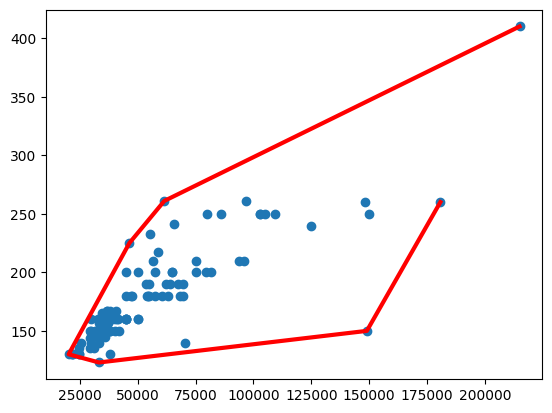

In [93]:
from scipy.spatial import ConvexHull
a = df_car['PriceEuro']
b = df_car['TopSpeed_KmH']
plt.scatter(a, b)
points = np.column_stack((a,b))
hull = ConvexHull(points)
plt.plot(a[hull.vertices],b[hull.vertices],'r-',lw=3)
plt.show


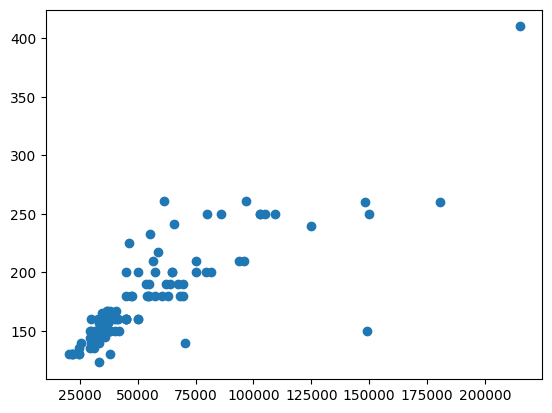

In [80]:
a = df_car['PriceEuro']
b = df_car['TopSpeed_KmH']
plt.scatter(a, b)
plt.show()


In [89]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_car.loc[:, 'BodyStyle'] = labelencoder.fit_transform(df_car.loc[:, 'BodyStyle'])
df_car['BodyStyle'].sum()

420